In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Diameter (km)')

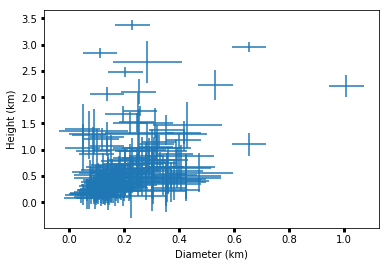

In [7]:
data = np.genfromtxt("Stanzel2008_Table1_conditioned.txt", delimiter=",", names=True)
plt.errorbar(data['Diameter']/1000., data['Height']/1000., 
             xerr=data['Diameter_unc']/1000., yerr=data['Height_unc']/1000., ls='')
plt.ylabel("Height (km)")
plt.xlabel("Diameter (km)")

0.08612339374557976 0.17137819171492186


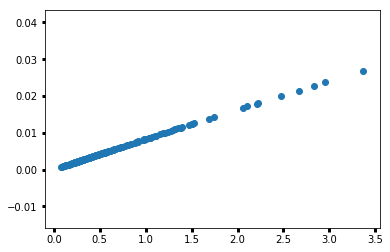

In [26]:
# 2019 Aug 21 - Exploring the predicted thermodynamic efficiency using numbers from Renno+ (2000)
def efficiency(num_scale_height, chi=0.22):
    return 1. - (1. - np.exp(-(chi + 1.)*num_scale_height))/((1. - np.exp(-num_scale_height))*(chi + 1.))

scale_height = 13000.

num_scale_heights = data['Height']/scale_height
efficiencies = efficiency(num_scale_heights)

plt.scatter(data['Height']/1000., efficiencies)
print(efficiency(1.), efficiency(4.))

/Users/bjackson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


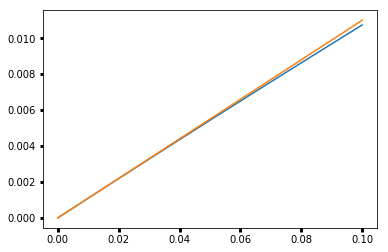

In [30]:
hypothetical_num_scale_heights = np.linspace(0, 0.1, 1000)
hypothetical_efficiencies = efficiency(hypothetical_num_scale_heights)
plt.plot(hypothetical_num_scale_heights, hypothetical_efficiencies)
plt.plot(hypothetical_num_scale_heights, 0.5*(0.22)*hypothetical_num_scale_heights)

# plt.ylim([0, 0.1])
# plt.xlim([0, 0.1])

[0.6564406  1.19375171]
[0.0907752  0.20587875]


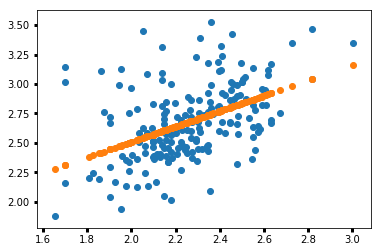

In [59]:
# plt.errorbar(data['Diameter'], data['Height'], xerr=data['Diameter_unc'], yerr=data['Height_unc'], ls='')
# plt.scatter(data['Diameter'], data['Height'])

ind = ~np.isnan(data['Height'])
# x = np.log10(data['Diameter'][ind])
# y = np.log10(data['Height'][ind])
# y_unc = data['Height_unc'][ind]/(y*np.log(10.))

x = np.log10(data['Diameter'][ind])
y = np.log10(data['Height'][ind])
y_unc = data['Height_unc'][ind]/(y*np.log(10.))

p, p_err = np.polyfit(x, y, 1, cov=True)
print(p)
print(np.sqrt(p_err.diagonal()))
plt.scatter(x, y)
plt.scatter(x, np.polyval(p, x))